# Проект e-commerce

#### Входные данные

**olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей**  
customer_id — позаказный идентификатор пользователя  
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)   
customer_zip_code_prefix —  почтовый индекс пользователя  
customer_city —  город доставки пользователя  
customer_state —  штат доставки пользователя  

**olist_orders_dataset.csv —  таблица заказов**  
order_id —  уникальный идентификатор заказа (номер чека)  
customer_id —  позаказный идентификатор пользователя  
order_status —  статус заказа  


- created —  создан
- approved —  подтверждён
- invoiced —  выставлен счёт
- processing —  в процессе сборки заказа
- shipped —  отгружен со склада
- delivered —  доставлен пользователю
- unavailable —  недоступен
- canceled —  отменён


order_purchase_timestamp —  время создания заказа  
order_approved_at —  время подтверждения оплаты заказа  
order_delivered_carrier_date —  время передачи заказа в логистическую службу  
order_delivered_customer_date —  время доставки заказа  
order_estimated_delivery_date —  обещанная дата доставки  

**olist_order_items_dataset.csv —  товарные позиции, входящие в заказы**  
order_id —  уникальный идентификатор заказа (номер чека)  
order_item_id —  идентификатор товара внутри одного заказа  
product_id —  ид товара (аналог штрихкода)  
seller_id — ид производителя товара  
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике  
price —  цена за единицу товара  
freight_value —  вес товара   

In [2]:
import pandas as pd

import requests
from urllib.parse import urlencode

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from datetime import timedelta
from calendar import monthrange

## Загрузим и исследуем данные

In [3]:
def url_ydisk (url):
    # api
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = url # ссылка на файл 

    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']

    # Загружаем файл в df
    return download_url

In [4]:
# если ссылки не работают, использую локальные файлы:
# customers = pd.read_csv('./data/olist_customers_dataset-1.csv') 
# orders = pd.read_csv('./data/olist_orders_dataset.csv', parse_dates = ['order_purchase_timestamp', 
#                                                                 'order_approved_at', 
#                                                                 'order_delivered_carrier_date',
#                                                                 'order_delivered_customer_date',
#                                                                 'order_estimated_delivery_date']) 
# items = pd.read_csv('./data/olist_order_items_dataset.csv') 

In [3]:
customers = pd.read_csv(url_ydisk('https://disk.yandex.ru/d/QXrVDUoQvFhIcg'))
orders = pd.read_csv(url_ydisk('https://disk.yandex.ru/d/0zWmh1bYP6REbw'), 
                     parse_dates = ['order_purchase_timestamp', 
                                    'order_approved_at', 
                                    'order_delivered_carrier_date',
                                    'order_delivered_customer_date',
                                    'order_estimated_delivery_date'])
items = pd.read_csv(url_ydisk('https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'))

In [5]:
print(customers.info())
customers.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [6]:
print(orders.info())
orders.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [7]:
print(items.info())
items.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [9]:
# Посмотрим на описательную статистику количественных показателей
items[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [10]:
# Посмотрим на распределение статусов заказов
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [5]:
# В каком диапазоне дат сделаны заказы?
dates_range = orders.order_approved_at.dropna().agg(['min', 'max'])
print('Orders from {} to {}'.format(*dates_range))

Orders from 2016-09-15 12:16:38 to 2018-09-03 17:40:06


Таким образом, у нас данные примерно за 2 года

In [6]:
# Во все ли месяцы была активность?
dates_cols = ['order_purchase_timestamp', 'order_approved_at', 
              'order_delivered_carrier_date', 'order_delivered_customer_date']

dates_df = orders[['order_id', *dates_cols]].melt(id_vars=['order_id'], value_vars=dates_cols) 

dates_df \
    .assign(months = dates_df['value'].dt.strftime('%Y-%m')) \
    .groupby(['variable', 'months'], as_index=False) \
    .order_id.nunique() \
    .pivot(index='months', columns='variable', values='order_id')

variable,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_purchase_timestamp
months,,,,
2016-09,1.0,NaN,NaN,4.0
2016-10,320.0,247.0,208.0,324.0
2016-11,NaN,32.0,60.0,NaN
2016-12,1.0,2.0,4.0,1.0
2017-01,760.0,612.0,283.0,800.0
2017-02,1765.0,1517.0,1351.0,1780.0
2017-03,2689.0,2717.0,2382.0,2682.0
2017-04,2374.0,2141.0,1849.0,2404.0
2017-05,3693.0,3709.0,3751.0,3700.0


Получается, что в 9, 11 и 12 месяцах 2016 года активности по заказам были существенно меньше, чем в другие месяцы. 
Так же в последние месяцы 2018 года, но это можно объяснить тем, что данные еще не были собраны на момент выгрузки базы.

## 1. Сколько пользователей, совершивших покупку только один раз? 

#### 1) Проверим, есть ли несоответствия в данных по заказам

In [37]:
# Cколько заказов со статусом delivered не имеют даты доставки?
orders[(orders['order_status'] == 'delivered') & 
       (orders['order_delivered_customer_date'].isna())]['order_id'].nunique()

8

In [28]:
# Cколько заказов со статусом delivered неоплачены (=без даты оплаты)? 
orders[(orders['order_status'] == 'delivered') & 
       (orders['order_approved_at'].isna())]['order_id'].nunique()

14

In [20]:
# Какие статусы у заказов с непустой датой оплаты?
orders \
    .groupby('order_status', as_index=False) \
    .agg(count_not_na = ('order_approved_at', 'count')) \
    .sort_values('count_not_na', ascending=False)

,order_status,count_not_na
3,delivered,96464
6,shipped,1107
7,unavailable,609
1,canceled,484
4,invoiced,314
5,processing,301
0,approved,2
2,created,0


#### 2) Дадим определение покупки
Покупкой будем считать оплаченный заказ (`order_approved_at` не пропущена). 

При этом:
- Отмененные заказы попадают под определение покупки. 
- Есть неоплаченные заказы со статусом "доставлен" (14 заказов), они не попадают под определение покупки. По данным нельзя понять причину отсутствия даты оплаты - может так отображается оплата наличными, а может это ошибка.

#### 3) Посчитаем пользователей с одной покупкой

In [21]:
# Объединим данные по пользователям и покупкам, 
# чтобы было соответствие уникального id пользователя и информации о заказе
merged_df1 = customers.merge(orders, on = 'customer_id') 

In [25]:
# Посчитаем число покупок для каждого пользователя
n_purchases = \
    merged_df1 \
    .query("~order_approved_at.isna()") \
    .groupby('customer_unique_id') \
    ['order_id'].nunique() 

In [14]:
print(f'Число покупателей с 1 покупкой: {n_purchases.value_counts()[1]}')
print(f'Процент покупателей с 1 покупкой: {n_purchases.value_counts(normalize=True)[1]*100:.2f}%')

Число покупателей с 1 покупкой: 93049
Процент покупателей с 1 покупкой: 96.93%


#### 4) Дополнительно посмотрим на все распределение числа покупок

In [26]:
print(f'\nПроценты покупателей с разным числом покупок:')
print(round(n_purchases.value_counts(normalize=True)*100, 3).astype(str) + '%')


Проценты покупателей с разным числом покупок:
1     96.929%
2      2.821%
3      0.199%
4      0.031%
5      0.008%
6      0.006%
7      0.003%
17     0.001%
9      0.001%
Name: order_id, dtype: object


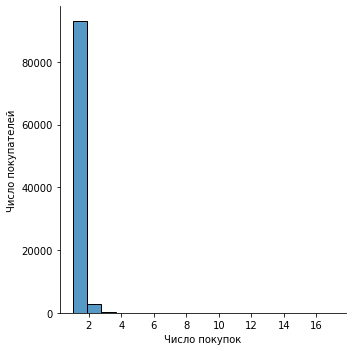

In [27]:
ax = sns.displot(n_purchases)
ax.set(xlabel='Число покупок', 
       ylabel='Число покупателей');

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

#### 1) Посмотрим как соотносится наличие или отсутствие даты доставки со статусом
О статусе доставки из данных можно судить по дате доставки (`order_delivered_customer_date`) и непосредственно по статусу (`order_status`).

In [4]:
# Какие статусы у заказов с непустой датой доставки?
orders[~orders['order_delivered_customer_date'].isna()]['order_status'].value_counts()

delivered    96470
canceled         6
Name: order_status, dtype: int64

Все логично: если есть дата доставки, то заказ либо доставлен, либо отменен (предположительно уже после доставки).

In [5]:
# Какие статусы у заказов с отсутствующей датой доставки?
orders[orders['order_delivered_customer_date'].isna()]['order_status'].value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

Несоответствие в данных: 8 заказов имеют статус `delivered`, но не имеют даты доставки. Будем считать заказ доставленным, если выполняется хотя бы одно из этих условий (есть дата доставки или статус `delivered`). 

Также есть статусы, всегда предшествующие доставке (`shipped`, `invoiced`, `processing`, `created`, `approved`). Возможно они не окончательны и в будущем еще изменятся на один из конечных статусов (предположительно это `canceled`, `unavailable`, `delivered`). Далее исследуем это подробнее.

In [21]:
# Посмотрим на даты заказов с "неокончательными" статусами, 
# чтобы сопоставить с датой самого последнего заказа в данных (2018-10-17)
orders[orders['order_status'].isin(['shipped', 'invoiced', 'processing', 'created', 'approved'])
      ].order_purchase_timestamp.describe(datetime_is_numeric=True)

count                             1729
mean     2017-11-11 08:24:28.522845696
min                2016-09-04 21:15:19
25%                2017-06-26 00:22:23
50%                2017-11-28 20:48:08
75%                2018-03-23 18:46:14
max                2018-09-03 09:06:57
Name: order_purchase_timestamp, dtype: object

In [19]:
# Посмотрим на данные заказов с "неокончательными" статусами и самыми ранними датами
orders[orders['order_status'].isin(['shipped', 'invoiced', 'processing', 'created', 'approved'])
      ].sort_values('order_purchase_timestamp').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
78824,dd359d3c294458c6d642b2eea9212bf5,5c58d1ea5a893380ecdd96dd6dfd5ec5,invoiced,2016-10-04 13:02:10,2016-10-05 03:08:27,NaT,NaT,2016-11-24
24222,711b9be9c346d9ecdb9d38a5e1e7e39b,81e4aed5ab4253757305267b80712689,invoiced,2016-10-04 13:38:37,2016-10-04 14:08:38,NaT,NaT,2016-11-24
18535,5cb8558cbb7c0c2f00f43468579d3e3c,2ff5a6455514da421bd25d6e4ceb1d12,shipped,2016-10-04 15:02:37,2016-10-05 03:10:59,2016-10-15 10:14:10,NaT,2016-12-02
32817,a6475bb7a50387e3c665534e15bd40ac,442d66f0d96f656096dd70f1b0391e40,invoiced,2016-10-04 16:28:25,2016-10-05 02:46:17,NaT,NaT,2016-11-28


Можно сделать вывод, что некоторые заказы остаются в одном из "неокончательных" статусов долгое время, поэтому мы не можем никак использовать предположение, что заказы с такими статусами были сделаны близко с дате среза данных и еще будут доставлены. 

#### 2) Дадим определение недоставленного заказа
Недоставленным заказом будем считать заказ с незаполненной датой доставки и любым статусом, кроме `delivered`.   

*Замечание: В данных есть 8 наблюдений со статусом `delivered`, но с пустой датой доставки. В текущей логике решения такие случаи рассмотриваются как доставленные заказы, но можно также рассмотреть версию, что в статусе ошибка и эти заказы на самом деле не были доставлены.* 

#### 3) Посмотрим сколько в среднем недоставленных заказов в месяц и выведем детализацию по причинам

Причины недоставленных заказов будем брать из их статусов.

In [28]:
# Создадим датафрейм с данными по недоставленным заказам
not_delivered = orders.query("order_delivered_customer_date.isna() & order_status != 'delivered'") 

In [37]:
# Проверим, нет ли повторяющихся заказов
print('unique: {}, total: '.format(not_delivered['order_id'].nunique()), not_delivered.shape[0])

unique: 2957, total:  2957


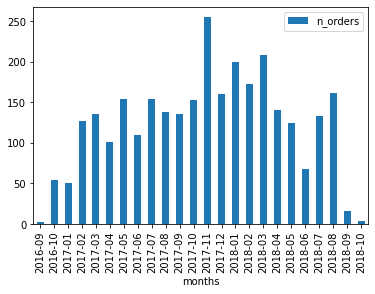

In [87]:
# Сначала посмотрим распределение недоставленных заказов по месяцам, в которые они были созданы 
not_delivered_summary = \
    not_delivered \
    .assign(months = not_delivered.order_purchase_timestamp.dt.strftime('%Y-%m')) \
    .groupby('months') \
    .agg(n_orders = ('order_id', 'count')) 

not_delivered_summary.plot(kind='bar')

Из графика видно, что в 2016 году последние 2 месяца были без недоставленных заказов, а в сентябре 2016 и в последние 2 месяца 2018 года наблюдается заметно более низкая активность. Из предварительного исследования данных (смотрели число непустых дат за каждый месяц) мы знаем, что это соответствует общей картине в данных.

Для общности возьмем все месяцы в расчет среднего (но можно также рассмотреть только активные). 

In [131]:
min_dt = min(not_delivered.order_purchase_timestamp)
max_dt = max(not_delivered.order_purchase_timestamp)

n_total_months = (max_dt.year - min_dt.year) * 12 + max_dt.month - min_dt.month

print(f'В среднем недоставленных заказов в месяц: {not_delivered.order_id.count()  / n_total_months}\n')
print(f'В среднем недоставленных заказов в месяц по причинам:')
not_delivered.groupby('order_status').order_id.count().sort_values(ascending=False) / n_total_months

В среднем недоставленных заказов в месяц: 118.28

В среднем недоставленных заказов в месяц по причинам:


order_status
shipped        44.28
canceled       24.76
unavailable    24.36
invoiced       12.56
processing     12.04
created         0.20
approved        0.08
Name: order_id, dtype: float64

In [137]:
# Посмотрим были ли оплачены заказы со статусами invoiced и processing 
# (если нет, может это является причиной того, что их не доставили)
sum(not_delivered[not_delivered.order_status.isin(['invoiced', 'processing'])]['order_approved_at'].isna())

0

Получили следующее:   

1) Больше всего заказов (около 44 заказов/месяц) не доставляется после того, как отгружается со склада. Можно предположить, что есть проблемы с логистикой.

2) Примерно по 24 заказа/месяц не доставляется по причинам отмены или недоступности.

3) Примерно по 12 заказов/месяц не доставляется после того, как выставлен счет или начался процесс сборки заказа. При этом по ним всем есть дата оплаты. Возможно есть проблема на этапе сборки заказа.

4) Меньше 1 заказа/месяц не доставляется после создания или подтверждения. Скорее всего это просто неполные данные и в дальнейшем такие заказы будут доставлены.

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [54]:
# Объединим данные по заказам и товарным позициям
merged_df3 = items.merge(orders, on = 'order_id')

In [57]:
# 1) Создадим переменную с названием дня недели оплаты заказа
# 2) Отфильтруем оплаченные заказы (определение покупки как в Задаче 1)
# 3) Посчитаем в скольких заказах был товар в каждый день недели
# 4) Отсортируем, чтобы оставить только максимальное значение
# 5) Сгруппируем по товарам и оставим первое значение в группе, оно максимальное благодаря сортировке 

popular_weekday = \
    merged_df3 \
    .assign(pay_weekday = merged_df3.order_purchase_timestamp.dt.day_name()) \
    .query("~order_approved_at.isna()") \
    .groupby(['product_id', 'pay_weekday'], as_index=False) \
    .agg(n_orders = ('order_id', 'nunique')) \
    .sort_values(['product_id', 'n_orders'], ascending = [True, False]) \
    .drop_duplicates(subset=['product_id'], keep='first') \
    .sort_values('n_orders', ascending = False)

popular_weekday.head()

,product_id,pay_weekday,n_orders
36507,99a4788cb24856965c36a24e339b6058,Monday,87
41039,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,75
20123,53b36df67ebb7c41585e8d54d6772e08,Tuesday,70
50191,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,60
15897,422879e10f46682990de24d770e7f83d,Thursday,58


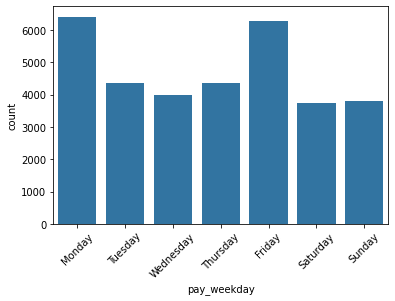

In [58]:
# Посмотрим распределение самых популярных дней недели 
ax = sns.countplot(data = popular_weekday, x = 'pay_weekday', 
                   order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                  color = 'tab:blue')
ax.tick_params(axis = 'x', rotation = 45)

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

#### 1) Уточним определение метрики
Для каждого пользователя выведем по месяцам, в которых у него были покупки, значение следующего показателя:   
*число покупок в данном месяце / число недель в данном месяце (может быть нецелым)*

Расчетные значения будем округлять до 2х знаков (число недель, число покупок в неделю, среднее по месяцам).


Месяцы, в которых у пользователя не было покупок, не будут выведены, в них значение метрики равно 0.

#### 2) Определим число недель в каждом месяце

In [76]:
# Создадим датафрейм со всеми месяцами в анализируемом периоде 
dates_range = orders.order_purchase_timestamp.dropna().agg(['min', 'max'])
months = pd.DataFrame(
    {'ym': pd.date_range(*dates_range.dt.strftime('%Y-%m'), freq='MS').strftime("%Y-%m").to_list()})

months['year'] = months.ym.str[:4].apply(int)
months['month'] = months.ym.str[5:].apply(int)
months.head(2)

,ym,year,month
0,2016-09,2016,9
1,2016-10,2016,10


In [77]:
# Добавим столбец с числом недель в месяце (метод monthrange из библиотеки calendar)
months['n_weeks'] = months.apply(lambda x: round(monthrange(x['year'], x['month'])[1] / 7, 2), axis=1)
months.head(2)

,ym,year,month,n_weeks
0,2016-09,2016,9,4.29
1,2016-10,2016,10,4.43


*Замечание:  
В данных некоторые месяцы представлены существенно меньшим числом наблюдений. Мы не знаем причину этого, но отметим, что возможно это несколько искажает метрику и стоит исключить эти неполные месяцы либо скорректировать число недель в них.*

#### 3) Посчитаем искомую метрику

In [78]:
# Объединим данные пользователей и заказов, отфильтруем оплаченные заказы (определение покупки как в Задаче 1)
merged_df4 = customers.merge(orders, on = 'customer_id')
merged_df4 = merged_df4.query("~order_approved_at.isna()") 

# Добавим столбцы с месяцами и числом недель в них
merged_df4['purchase_at_ym'] = merged_df4.order_purchase_timestamp.dt.strftime('%Y-%m')

In [79]:
# Посчитаем число заказов в месяц для каждого пользователя
trgt_metric = \
            merged_df4 \
            .groupby(['customer_unique_id', 'purchase_at_ym'], as_index=False) \
            .agg(n_orders = ('order_id', 'nunique'))
trgt_metric.head()

,customer_unique_id,purchase_at_ym,n_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1


In [80]:
# Добавим число недель в датафрейм
trgt_metric = trgt_metric.merge(months[['ym', 'n_weeks']], left_on = 'purchase_at_ym', right_on = 'ym')
trgt_metric = trgt_metric.drop(columns='ym')

In [81]:
# Посчитаем число заказов в неделю для каждого пользователя по месяцам
trgt_metric['week_avg'] = round(trgt_metric['n_orders'] / trgt_metric['n_weeks'], 2)
trgt_metric.sort_values(['week_avg'], inplace=True)
trgt_metric.head()

,customer_unique_id,purchase_at_ym,n_orders,n_weeks,week_avg
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.43,0.23
63955,8ee3fb71a70e0c0062e676fe02aec2ef,2018-01,1,4.43,0.23
63954,8ed5dcd97281d7756bbcbb0cef40e17c,2018-01,1,4.43,0.23
63953,8ed3eba2d3f60776d559b6d704748b18,2018-01,1,4.43,0.23
63952,8ec1dbe8a5e435ff67eed21bbf78b170,2018-01,1,4.43,0.23


In [82]:
# Посмотрим на описательную статистику для метрики
trgt_metric['week_avg'].describe().round(3)

count    97916.000
mean         0.235
std          0.029
min          0.230
25%          0.230
50%          0.230
75%          0.230
max          1.350
Name: week_avg, dtype: float64

## 5. Провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц. 

#### 1) Опеределим параметры для когортного анализа

**Признак формирования когорты**: сформируем когорты по дате первого заказа

*Комментарий:  
Отметим, что мы не знаем, какую долю в базе составляют постоянные клиенты, а какую - новые покупатели, но это важно для интерпретации результатов. Будем считать, что наши данные содержат сведения, начиная с самых первых действий клиента, и мы можем выбрать не просто заказ с минимальной датой, а действительно первый заказ для каждого покупателя.*

**Размер когорты**: месяц

**Отчетный период**: с 01.01.2027 по 31.12.2017  

**Анализируемый ключевой показатель**: Retention Rate

#### 2) Сформируем когорты

In [84]:
# Возьмем уникальный id пользователя из customers
merged_df5 = orders.merge(customers, on = 'customer_id')

# Выберем нужный период в данных и оставим только оплаченные заказы
merged_df5 = merged_df5 \
            .query("(order_purchase_timestamp >= '2017-01-01') & (order_purchase_timestamp <= '2017-12-31') \
                   & ~order_approved_at.isna()") \
            .reset_index(drop=True)[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]

# Добавим колонку с месяцем заказа
merged_df5['purchase_month'] = merged_df5['order_purchase_timestamp'].dt.to_period('M')

# Добавим колонку с когортой
merged_df5['cohort_month'] = \
    merged_df5.groupby('customer_unique_id')['purchase_month'] \
    .transform(lambda x: (min(x))) 

merged_df5.sort_values(['customer_unique_id', 'order_purchase_timestamp'], inplace=True)
merged_df5.head()

,customer_unique_id,order_id,order_purchase_timestamp,purchase_month,cohort_month
11977,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,2017-03,2017-03
44534,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,2017-10,2017-10
18792,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,2017-11,2017-11
32148,0005e1862207bf6ccc02e4228effd9a0,ae76bef74b97bcb0b3e355e60d9a6f9c,2017-03-04 23:32:12,2017-03,2017-03
11859,0006fdc98a402fceb4eb0ee528f6a8d4,6681163e3dab91c549952b2845b20281,2017-07-18 09:23:10,2017-07,2017-07


#### 3) Посчитаем retention и представим его в виде матрицы

In [85]:
# Число покупателей в каждый месяц в каждой когорте 
cohort_df = \
    merged_df5.groupby(['cohort_month', 'purchase_month'], as_index=False) \
    .agg(n_customers=('customer_unique_id', 'nunique')) 


# Добавим колонку с индексом когорты (сколько месяцев прошло с момента первого заказа)
cohort_df['period_number'] = cohort_df.apply(lambda x: (x['purchase_month'] - x['cohort_month']).n, axis=1)
cohort_df

,cohort_month,purchase_month,n_customers,period_number
0,2017-01,2017-01,763,0
1,2017-01,2017-02,3,1
2,2017-01,2017-03,2,2
3,2017-01,2017-04,1,3
4,2017-01,2017-05,3,4
...,...,...,...,...
72,2017-10,2017-11,31,1
73,2017-10,2017-12,11,2
74,2017-11,2017-11,7298,0
75,2017-11,2017-12,40,1


In [86]:
# Развернем cohort_df таким образом, чтобы строки представляли когорты, а столбцы периоды. 
# Таким образом в ячейках будут значения числа покупателей из определенной когорты в определенный период.
cohort_pivot = cohort_df.pivot_table(index = 'cohort_month',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,763.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0
2017-02,1738.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,NaN
2017-03,2634.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN,NaN
2017-04,2349.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3590.0,17.0,18.0,14.0,11.0,12.0,15.0,6.0,NaN,NaN,NaN,NaN
2017-06,3138.0,15.0,11.0,13.0,8.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN
2017-07,3890.0,20.0,14.0,10.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4181.0,28.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4128.0,28.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Теперь создадим такую же матрицу для показателя retention rate.
# Для этого в cohort_pivot поделим каждое значение в строке на 1-е значение в этой же строке (= размеру когорты). 

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,1.0,0.003932,0.002621,0.001311,0.003932,0.001311,0.005242,0.001311,0.001311,NaN,0.003932,0.001311
2017-02,1.0,0.002301,0.002877,0.001151,0.004028,0.001151,0.002301,0.001726,0.001151,0.002301,0.001151,NaN
2017-03,1.0,0.004935,0.003417,0.003797,0.003417,0.001519,0.001519,0.003037,0.003417,0.000759,NaN,NaN
2017-04,1.0,0.005960,0.002129,0.001703,0.003406,0.002554,0.003406,0.002980,0.002980,NaN,NaN,NaN
2017-05,1.0,0.004735,0.005014,0.003900,0.003064,0.003343,0.004178,0.001671,NaN,NaN,NaN,NaN
2017-06,1.0,0.004780,0.003505,0.004143,0.002549,0.003824,0.003824,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005141,0.003599,0.002571,0.002828,0.002057,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006697,0.003348,0.002631,0.003588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006783,0.005329,0.002665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


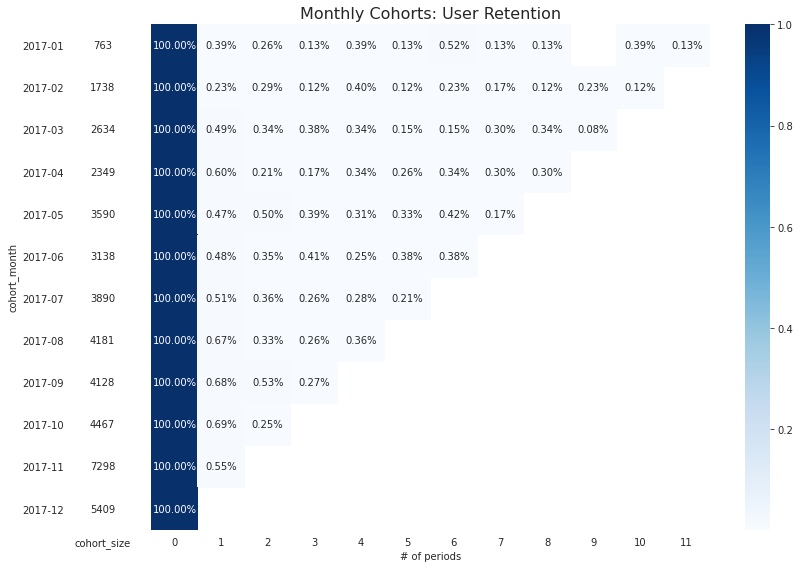

In [72]:
# Отобразим матрицу с retention rate в виде тепловой карты.
# Также отобразим на ней размер когорты. 

import matplotlib.colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # матрица retention
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.2%', 
                cmap='Blues', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # размер когорты
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

#### 4) Выявим когорту с самым высоким retention на 3й месяц в период с января по декабрь.

In [73]:
retention_matrix[3].idxmax()

Period('2017-06', 'M')

**Общие выводы**

В первый месяц доля пользователей с повторными покупками чуть выше (но выделяется февральская когорта, в ней показатель примерно в 2 раза меньше, чем в других когортах), далее в основном снижается, но в целом retention rate низкий (< 1%) во все периоды и во всех когортах без явных исключений.


### 6. Построить RFM-сегментацию пользователей. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации кластеров. 


В кластеризации выберем следующие метрики: 
- Recency - время от последней покупки пользователя до текущей даты, 
- Frequency - суммарное количество покупок у пользователя за всё время, 
- Monetary - сумма покупок за всё время. 

#### 1) Подготовим данные для расчетов

In [4]:
# Объединим данные в один датасет, при этом возьмем только оплаченные заказы
merged_df6 = customers.merge(orders[~orders.order_approved_at.isna()], on = 'customer_id')
merged_df6 = merged_df6.merge(items, on = 'order_id')  

In [5]:
# Посчитаем сумму каждого заказа
orders_price = merged_df6[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']] \
                .groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], as_index=False) \
                .agg({'price': 'sum'})
orders_price.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [6]:
# Определим максимальную дату в данных, чтобы к ней привязать дату анализа now, необходимую для расчета Recency
dates_cols = ['order_purchase_timestamp', 'order_approved_at', 
              'order_delivered_carrier_date', 'order_delivered_customer_date']

max_date = orders[['order_id', *dates_cols]].melt(id_vars=['order_id'], value_vars=dates_cols).value.max() 

# Присвоим now значение, равное максимальной дате в данных + 1 день, чтобы имитировать анализ в реальном времени
now = max_date + timedelta(days=1) 
now

Timestamp('2018-10-18 17:30:18')

In [7]:
# Добавим столбец с разницей между текущей датой (now) и датой заказа 
orders_price['days_since_order'] = orders_price['order_purchase_timestamp'].apply(lambda x: (now - x).days)
orders_price.head()

,order_id,order_purchase_timestamp,customer_unique_id,price,days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90,400
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90,540
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00,277
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99,71
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90,621


#### 2) Посчитаем значения Recency, Frequency, Monetary для каждого пользователя

In [8]:
rfm = orders_price \
        .groupby('customer_unique_id', as_index=False) \
        .agg(Recency = ('days_since_order', 'min'),
             Frequency = ('order_purchase_timestamp', 'count'),
             Monetary = ('price', 'sum'))

rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90
2,0000f46a3911fa3c0805444483337064,586,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00


#### 3) Определим значения R, F, M 
Для каждого покупателя назначим оценку от 1 до 3 по каждому параметру.

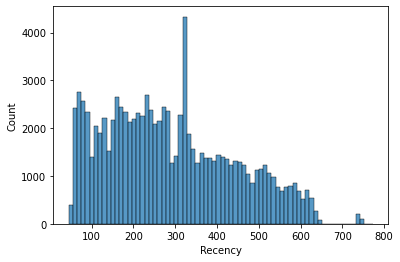

In [9]:
# Посмотрим на распределение числа дней с момента последней покупки
sns.histplot(rfm['Recency'])

Видим относительно стабильную активность в последние примерно 330 дней и затем постепеннное убывание активности с увеличением давности. Видимо наш продукт покупают не часто, но так как точной информации об особенностях бизнеса нет и в целом график довольно плавный, выберем определить значения сегментов Recency через квантили.

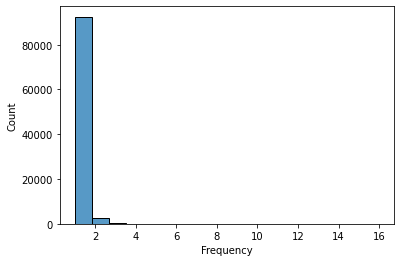

In [108]:
# Посмотрим на распределение частоты покупок
sns.histplot(rfm['Frequency'])

Существенная часть клиентов совершила только 1 покупку, выделим их в отдельный сегмент Frequency=1.  
Покупателей, которые совершили 2 покупки отнесем к Frequency=2.  
Остальных покупателей, то есть у кого больше 2-х покупок в сегмент Frequency=3.

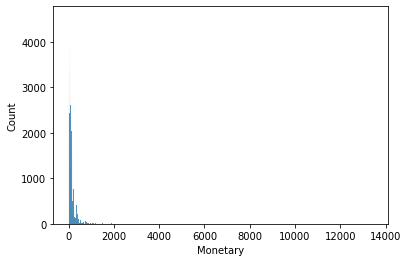

In [123]:
# Посмотрим на распределение суммы покупок
sns.histplot(rfm['Monetary'])

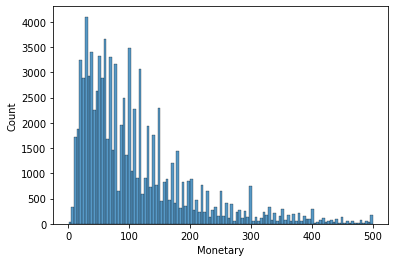

In [130]:
# Отфильтруем наблюдения, чтобы посмотреть на график подробнее
sns.histplot(rfm[rfm['Monetary'] < 500]['Monetary'])

Большинство покупателей потратили относительно небольшие суммы, при этом есть длинный хвост из редких крупных сумм. 
Снижение графика довольно плавное, поэтому определим сегменты для Monetary на основе квантилей.

In [9]:
# Рассчитаем квантили для Recency и Monetary, чтобы по ним установить границы сегментов
limits = rfm[['Recency', 'Monetary']].quantile([0, .33, .66, 1]).to_dict()
limits

{'Recency': {0.0: 45.0, 0.33: 197.0, 0.66: 336.0, 1.0: 773.0},
 'Monetary': {0.0: 0.85, 0.33: 57.99, 0.66: 125.0, 1.0: 13440.0}}

In [11]:
# Зададим границы для Frequency:
limits['Frequency'] = {.33: 1.0, .66: 2.0}
limits

{'Recency': {0.0: 45.0, 0.33: 197.0, 0.66: 336.0, 1.0: 773.0},
 'Monetary': {0.0: 0.85, 0.33: 57.99, 0.66: 125.0, 1.0: 13440.0},
 'Frequency': {0.33: 1.0, 0.66: 2.0}}

In [12]:
# Напишем метод, который задает значения R, F, M (от 1 до 3).
def rfm_score(x, c, s):
    if x <= limits[c][.33]:
        return s[0]
    elif x <= limits[c][.66]:
        return s[1]
    else:
        return s[2]

In [13]:
# Для Recency чем меньше значение, тем лучше, для Frequency и Monetary, наоборот, лучше большие значения. 
# Поэтому зададим соответствующие значения в переменной s так, чтобы от 1 к 3 значило от худшего к лучшему.
scores = [1, 2, 3]

rfm['R'] = rfm['Recency'].apply(lambda x: rfm_score(x, 'Recency', scores[::-1]))
rfm['F'] = rfm['Frequency'].apply(lambda x: rfm_score(x, 'Frequency', scores))
rfm['M'] = rfm['Monetary'].apply(lambda x: rfm_score(x, 'Monetary', scores))
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,3,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,3,1,1
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,1,1,1
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,1,1,3


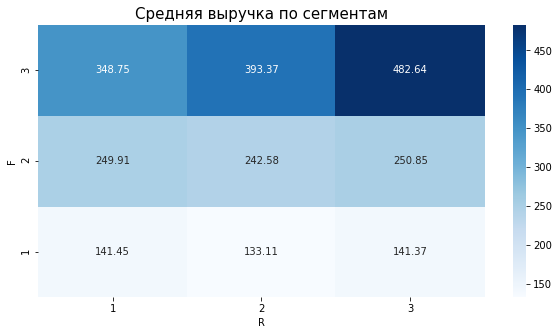

In [21]:
rfm_tbl = rfm.pivot_table(index='F', columns='R', values = 'Monetary', aggfunc=np.mean).applymap(float)

plt.figure(figsize=(10, 5))
sns.heatmap(rfm_tbl, annot=True, fmt='.2f', cmap='Blues')
plt.title('Средняя выручка по сегментам', fontsize=15)
plt.gca().invert_yaxis()

Ожидаемо наибольшую выручку принесли пользователи с наибольшей частотой покупок и близкой к сегодняшнему дню последней покупки.

#### 4) Определим сегменты покупателей на основе оценок RFM

In [25]:
# Объединим значения R, F и M в RFM Score
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,3,1,3,313
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,1,1,3,113


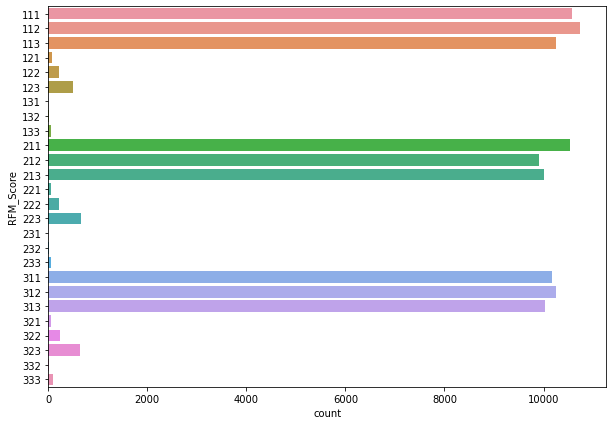

In [15]:
# Посмотрим на распределение RFM значений
plt.figure(figsize=(10, 7))
sns.countplot(y = rfm['RFM_Score'], order = rfm['RFM_Score'].sort_values().unique())

#### 5) Выделим наиболее интересные RFM-сегменты, к которым могут быть применены различные маркетинговые действия:

- Сегмент 11х - "спящие": покупали очень давно (336-773 дня назад) и лишь однажды 
- Сегмент 12х/13х - "в зоне потери": покупали очень давно (336-773 дня назад), но сделали 2 и больше покупок


- Сегмент 21x - "дрейфующие": покупали не так давно (197-336 дней назад) и лишь однажды 
- Сегмент 22x/23x - "в зоне риска": покупали не так давно (197-336 дней назад), сделали 2 и более покупки


- Сегмент 31х/32х - "новички": купили недавно (45-197 дней назад) и сделали 1-2 покупки
- Сегмент 332/333 - "чемпионы": купили недавно (45-197 дней назад), покупают часто (2 и более раз) и на относительно большую сумму за 2 года (>57.99)


Также можно объединить в более общие сегменты:

- Сегмент x3x - "лояльные": покупатели с 3 и более покупками (таких очень мало в данных, но интересно исследовать эту группу, чтобы понять инструменты ее увеличения)
- Сегмент x2x - "перспективные": покупатели с 2 покупками
- Сегмент xx1 - "с низкой суммой": покупатели с низкой суммой покупок за 2 года (<57.99)

In [40]:
segt_map = {
    r'11[1-3]': 'спящие',
    r'1[2-3][1-3]': 'в зоне потери',
    r'21[1-3]': 'дрейфующие',
    r'2[2-3][1-3]': 'в зоне риска',
    r'3[1-2][1-3]': 'новички',
    r'33[2-3]': 'чемпионы'
}

rfm['Segment'] = rfm['RFM_Score'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,3,1,3,313,новички
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,3,1,1,311,новички
2,0000f46a3911fa3c0805444483337064,586,1,69.00,1,1,2,112,спящие
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,1,1,1,111,спящие
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,1,1,3,113,спящие


In [43]:
rfm_summary = \
    rfm.groupby('Segment').agg(Recency_mean=('Recency', 'mean'), 
       Frequency_mean=('Frequency', 'mean'),
       Monetary_mean=('Monetary', 'mean'),
       n=('Monetary', 'count')).round(2).sort_values('n')
rfm_summary

,Recency_mean,Frequency_mean,Monetary_mean,n
Segment,,,,
чемпионы,123.84,3.51,482.64,109
в зоне потери,453.90,2.09,257.46,864
в зоне риска,266.43,2.09,252.43,995
дрейфующие,268.14,1.00,133.11,30459
новички,124.83,1.03,144.66,31418
спящие,466.55,1.00,141.45,31562


**Общие замечания**  
Так как 97% покупателей в наших данных совершили только 1 покупку за 2 года, можно предположить, что наш продукт не принято приобретать регулярно, в таком случае RFM-анализ может оказаться не слишком полезен.


Но с другой стороны, у нас есть несколько покупателей с большим числом покупок (до 16) за 2 года, интересно исследовать эту группу подробнее, возможно есть потенциал заметно увеличить число повторных покупок, проведя подходящие маркетинговые компании среди RFM сегментов с 1 покупкой.